# Trabajo práctico integrador: Aprendizaje de maquinas 1

Integrantes:
- Julio Agustín Donadello (a1505)
- Diego Braga (a1522)
- Eduardo Echeverria (a1516)
- Marco Joel Isidro (a1520)
- Diego Sarina (a1519)

# Introducción

Para el presente trabajo se utilizó un dataset sobre el clima en Australia, el cual contiene información sobre diferentes ciudades de Australia durante 10 años, incluyendo datos como la temperatura, la velocidad y dirección del viento, las precipitaciones, entre otros.

Dataset utilizado: [Kaggle - Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data)

El dataset contiene las siguientes columnas:
* **Date:** fecha de la observación.
* **Location:** nombre de la ubicación de la estación meteorológica.
* **MinTemp:** temperatura mínima en grados Celsius.
* **MaxTemp:** temperatura máxima en grados Celsius.
* **Rainfall:** precipitaciones durante el día en mm.
* **Evaporation:** evaporación en mm durante 24h hasta las 9am.
* **Sunshine:** horas de sol en el día.
* **WindGustDir:** dirección de la ráfaga de viento más fuerte.
* **WindGustSpeed:** velocidad de la ráfaga de viento más fuerte en km/h.
* **WindDir9am:** dirección del viento a las 9am.
* **WindDir3pm:** dirección del viento a las 3pm.
* **WindSpeed9am:** velocidad del viento promediando los 10 minutos previos a las 9am en km/h.
* **WindSpeed3pm:** velocidad del viento promediando los 10 minutos previos a las 3pm en km/h.
* **Humidity9am:** humedad a las 9am en porcentaje.
* **Humidity3pm:** humedad a las 3pm en porcentaje.
* **Pressure9am:** presión a las 9am en hpa.
* **Pressure3pm:** presión a las 3pm en hpa.
* **Cloud9am:** Fracción del cielo cubierta por nubes a las 9am en oktas.
* **Cloud3pm:** Fracción del cielo cubierta por nubes a las 3pm en oktas.
* **Temp9am:** temperatura a las 9am en grados Celsius.
* **Temp3pm:** temperatura a las 3pm en grados Celsius.
* **RainToday:** si llovió hoy más de 1mm durante 24h hasta las 9am.
* **RainTomorrow:** si lloverá mañana.

Un dato importante a la hora de realizar el análisis exploratorio, la limpieza y la preparación de los datos es el objetivo que se busca alcanzar con el análisis. En este caso, el objetivo es predecir si lloverá al día siguiente o no, en función de los datos meteorológicos del día actual.

Antes de comenzar se importan todas las librerías necesarias con el objetivo de brindar claridad al código y facilitar su lectura.



**NOTA**: Utilizamos el mismo dataset para la materia "Analisis de Datos", en el cual nos familizariamos con el dataset, sus features, hicimos el analisis exploratorio, etc. Para esta oportunidad, tomaremos el dataset ya corregido que se encuentra en:

```
├── dataset
│   └── weatherAUS.csv
│   └── weatherCORREGIDO.csv
```

In [1]:
#generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import scipy.stats as stats

#tratamiento de datos faltantes e imputación
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

#selección de variables
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

#configuraciones generales
pd.set_option('display.max_columns', None)

# Análisis exploratorio

In [2]:
#carga de los datos
weather_df = pd.read_csv("./dataset/dataset_corregido.csv")

#cantidad de elementos en el dataset
print(weather_df.shape)

(142193, 75)


In [3]:
# Visualizacion de las primeras 10 filas
weather_df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,13.4,22.9,0.6,10.72,9.88,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.8,16.9,21.8,0,0,12,2008,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-1.836970e-16,-1.000000e+00,-1.836970e-16,-0.923880,3.826834e-01
1,7.4,25.1,0.0,7.84,12.12,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.8,2.6,17.2,24.3,0,0,12,2008,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.923880,3.826834e-01,-3.826834e-01,9.238795e-01,-0.923880,-3.826834e-01
2,12.9,25.7,0.0,7.92,11.58,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.8,2.0,21.0,23.2,0,0,12,2008,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.923880,-3.826834e-01,-1.000000e+00,-1.836970e-16,-0.923880,-3.826834e-01
3,9.2,28.0,0.0,5.76,10.86,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.8,2.0,18.1,26.5,0,0,12,2008,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.707107,7.071068e-01,7.071068e-01,-7.071068e-01,1.000000,6.123234e-17
4,17.5,32.3,1.0,6.00,8.44,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,2008,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-1.836970e-16,9.238795e-01,3.826834e-01,-0.707107,7.071068e-01
5,14.6,29.7,0.2,8.40,10.88,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,3.4,4.0,20.6,28.9,0,0,12,2008,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.923880,3.826834e-01,-1.000000e+00,-1.836970e-16,-1.000000,-1.836970e-16
6,14.3,25.0,0.0,9.56,12.22,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,1.4,18.1,24.6,0,0,12,2008,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-1.836970e-16,-7.071068e-01,-7.071068e-01,-1.000000,-1.836970e-16
7,7.7,26.7,0.0,6.24,10.32,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,1.4,3.8,16.3,25.5,0,0,12,2008,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-1.836970e-16,3.826834e-01,-9.238795e-01,-1.000000,-1.836970e-16
8,9.7,31.9,0.0,8.08,8.50,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,3.2,3.4,18.3,30.2,0,1,12,2008,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.382683,9.238795e-01,7.071068e-01,-7.071068e-01,-0.707107,7.071068e-01
9,13.1,30.1,1.4,7.44,10.32,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,1.8,2.8,20.1,28.2,1,0,12,2008,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-1.836970e-16,1.224647e-16,-1.000000e+00,0.382683,-9.238795e-01


In [4]:
# Eliminar columnas con 
weather_df = weather_df.drop(weather_df.filter(like='Location_').columns, axis=1)

In [5]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
count,142193.000000,142193.000000,142193.000000,142193.000000,1.421930e+05,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,1.421930e+05,142193.000000,1.421930e+05,142193.000000,1.421930e+05
mean,12.189158,23.227503,2.327332,5.168594,7.462310e+00,39.927788,13.978424,18.564792,68.954548,51.551311,1017.733790,1015.331541,4.425209,4.474195,16.963983,21.717712,0.221305,0.224181,6.402544,2012.758926,15.715084,-0.033483,-5.555817e-02,0.013028,2.146866e-02,-0.017099,-4.611899e-02
std,6.401442,7.114948,8.426289,3.720718,3.518022e+00,13.157544,8.871215,8.782831,19.033849,20.697823,6.936084,6.855645,2.619865,2.427474,6.505241,6.965550,0.415127,0.417043,3.426506,2.541256,8.798150,0.721006,6.898907e-01,0.690669,7.227397e-01,0.712556,6.998942e-01
min,-8.500000,-4.800000,0.000000,0.000000,-8.881784e-16,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,1.000000,2007.000000,1.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00
25%,7.600000,17.900000,0.000000,2.600000,4.900000e+00,31.000000,7.000000,13.000000,57.000000,37.000000,1013.200000,1010.700000,2.000000,2.400000,12.200000,16.600000,0.000000,0.000000,3.000000,2011.000000,8.000000,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01
50%,12.000000,22.600000,0.000000,4.480000,8.080000e+00,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,4.800000,16.700000,21.100000,0.000000,0.000000,6.000000,2013.000000,16.000000,0.000000,-1.836970e-16,0.000000,6.123234e-17,0.000000,-1.836970e-16
75%,16.900000,28.200000,0.600000,6.800000,1.030000e+01,46.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1019.940000,7.000000,7.000000,21.500000,26.450000,0.000000,0.000000,9.000000,2015.000000,23.000000,0.707107,7.071068e-01,0.707107,7.071068e-01,0.707107,7.071068e-01
max,33.900000,48.100000,371.000000,145.000000,1.450000e+01,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,8.000000,8.000000,40.200000,46.700000,1.000000,1.000000,12.000000,2017.000000,31.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00


In [6]:
#análisis rápido de los tipos de datos de cada variable
print(f"Dataset info: \n{weather_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          142193 non-null  float64
 1   MaxTemp          142193 non-null  float64
 2   Rainfall         142193 non-null  float64
 3   Evaporation      142193 non-null  float64
 4   Sunshine         142193 non-null  float64
 5   WindGustSpeed    142193 non-null  float64
 6   WindSpeed9am     142193 non-null  float64
 7   WindSpeed3pm     142193 non-null  float64
 8   Humidity9am      142193 non-null  float64
 9   Humidity3pm      142193 non-null  float64
 10  Pressure9am      142193 non-null  float64
 11  Pressure3pm      142193 non-null  float64
 12  Cloud9am         142193 non-null  float64
 13  Cloud3pm         142193 non-null  float64
 14  Temp9am          142193 non-null  float64
 15  Temp3pm          142193 non-null  float64
 16  RainToday        142193 non-null  int6

In [7]:
dtypes = weather_df.dtypes 
num_columns = dtypes[dtypes == 'int64'].count() + dtypes[dtypes == 'float64'].count()
cat_columns = dtypes[dtypes == 'object'].count()
print(f"Cant. features numéricos: {num_columns} \nCant. features no numéricos: {cat_columns}")

Cant. features numéricos: 27 
Cant. features no numéricos: 0


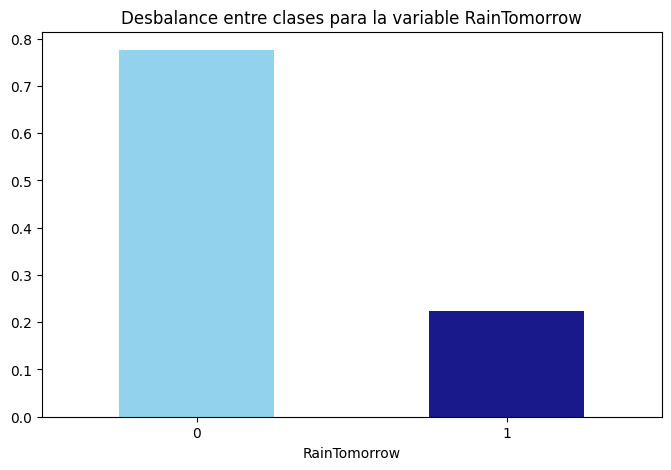

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
weather_df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Desbalance entre clases para la variable RainTomorrow')
plt.show()

Vemos que tenemos un claro desbalance entre las clases que puede afectar al modelo. Para solucionar esto, debemos reducir la muestra de la mayoría o sobremuestrear la minoría para equilibrar.

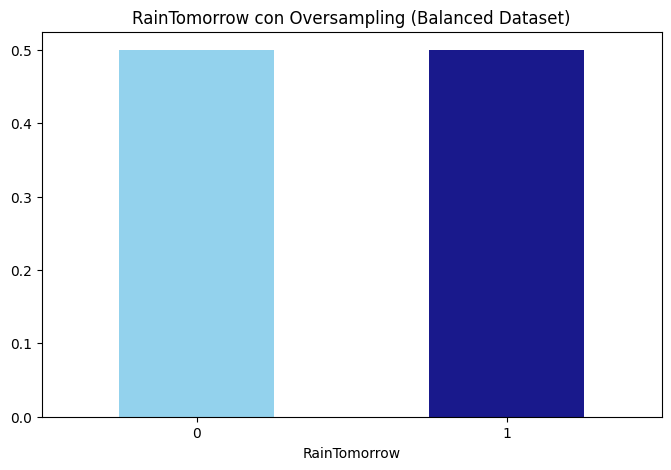

In [9]:
from sklearn.utils import resample

no =weather_df[weather_df.RainTomorrow == 0]
yes = weather_df[weather_df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow con Oversampling (Balanced Dataset)')
plt.show()

In [10]:
# Voy a revisar ahora que no tengo datos nulos

missing_values=weather_df.isnull().sum() # missing values

percent_missing = weather_df.isnull().sum()/weather_df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : weather_df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
MinTemp,0,0.0,float64
MaxTemp,0,0.0,float64
Rainfall,0,0.0,float64
Evaporation,0,0.0,float64
Sunshine,0,0.0,float64
WindGustSpeed,0,0.0,float64
WindSpeed9am,0,0.0,float64
WindSpeed3pm,0,0.0,float64
Humidity9am,0,0.0,float64
Humidity3pm,0,0.0,float64


## feature selection

Seleccionar características mediante el método de filtrado (valor de chi-cuadrado): antes de hacer esto, primero debemos normalizar nuestros datos. Usamos MinMaxScaler en lugar de StandardScaler para evitar valores negativos.

In [11]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(weather_df)
modified_data = pd.DataFrame(r_scaler.transform(weather_df), index=weather_df.index, columns=weather_df.columns)

In [12]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Cloud9am', 'Cloud3pm', 'RainToday', 'WindGustDir_sin',
       'WindDir9am_sin'],
      dtype='object')


In [14]:
# Selecciono las features con un random forest 

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = weather_df.drop('RainTomorrow', axis=1)
y = weather_df['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm']
[0.03725433 0.03496241 0.04094151 0.03447552 0.09202319 0.0460325
 0.02552044 0.02743524 0.04174183 0.13641177 0.05011719 0.05783769
 0.03514529 0.06711872 0.03542338 0.03606924 0.01986218 0.02034904
 0.02073223 0.02944682 0.01780459 0.01846865 0.01775086 0.01942449
 0.01724983 0.02040106]


### Training

Dividiremos el conjunto de datos en conjuntos de entrenamiento (75%) y de prueba (25%) respectivamente para entrenar el modelo de predicción de lluvia. Para obtener mejores resultados, estandarizaremos nuestros datos X_train y X_test:

In [37]:
features_list = list(weather_df.columns.values)


In [38]:
features_list.remove("RainTomorrow")
features_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'Month',
 'Year',
 'Day',
 'WindGustDir_sin',
 'WindGustDir_cos',
 'WindDir9am_sin',
 'WindDir9am_cos',
 'WindDir3pm_sin',
 'WindDir3pm_cos']

In [39]:
features = weather_df[features_list]
target = weather_df['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [40]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Función para ejecutar y evaluar el modelo
def run_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, probs)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - start_time

    # Plot ROC curve
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    # Plot Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    plt.show()

    return model, accuracy, roc_auc, coh_kap, time_taken

# Función para graficar la curva ROC
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

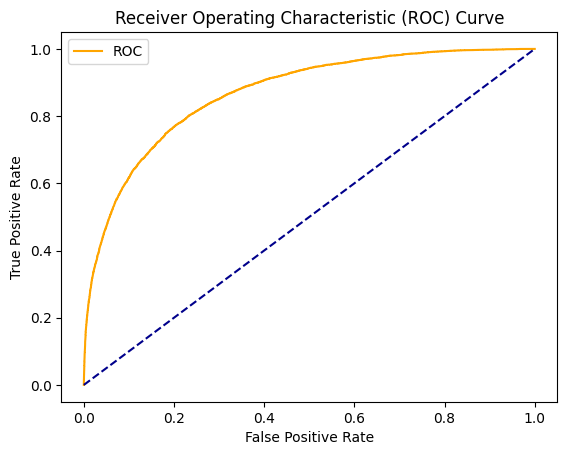

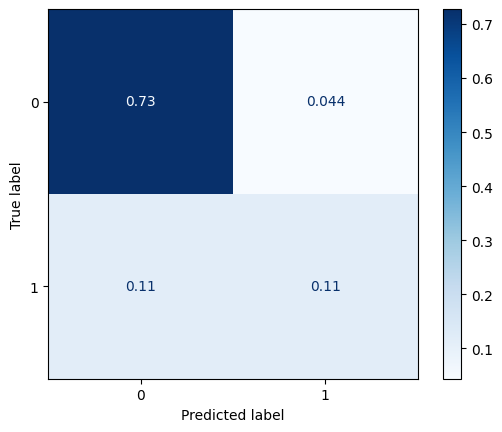

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

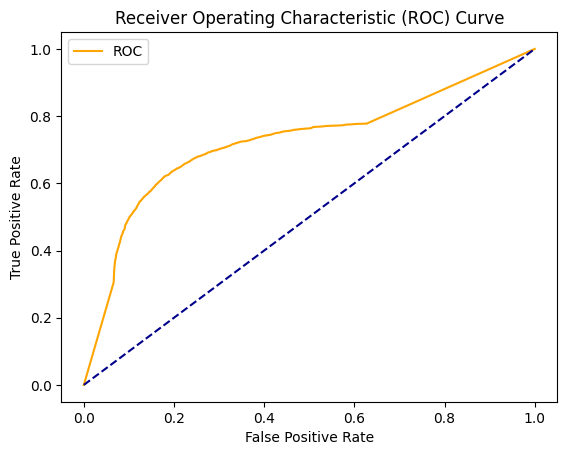

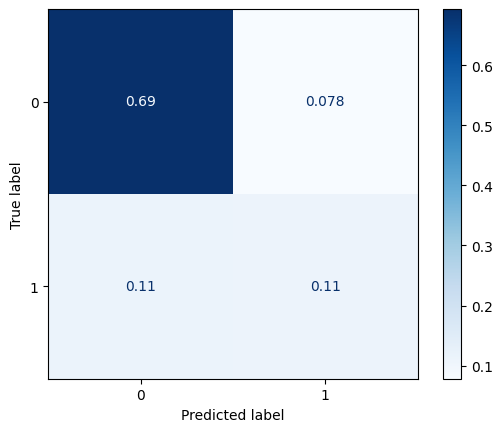

In [47]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

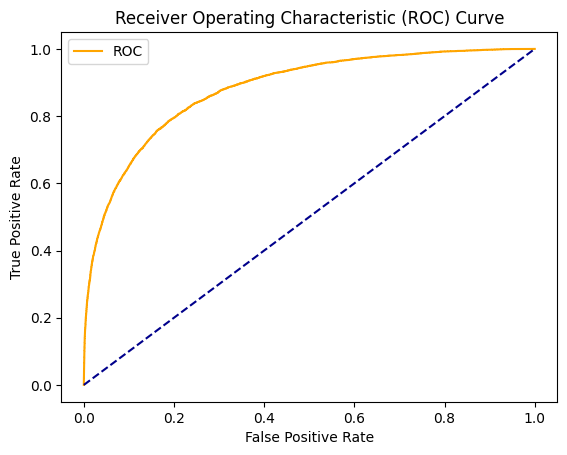

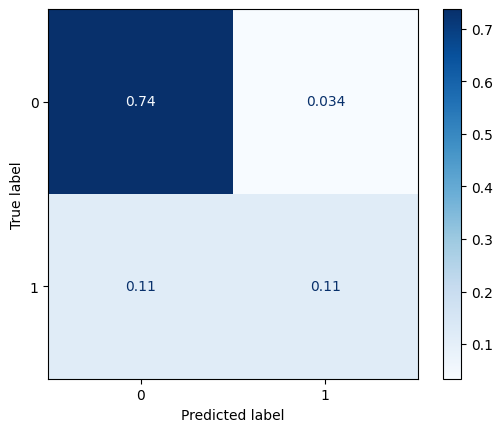

In [48]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 23755, number of negative: 82889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2937
[LightGBM] [Info] Number of data points in the train set: 106644, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222750 -> initscore=-1.249709
[LightGBM] [Info] Start training from score -1.249709


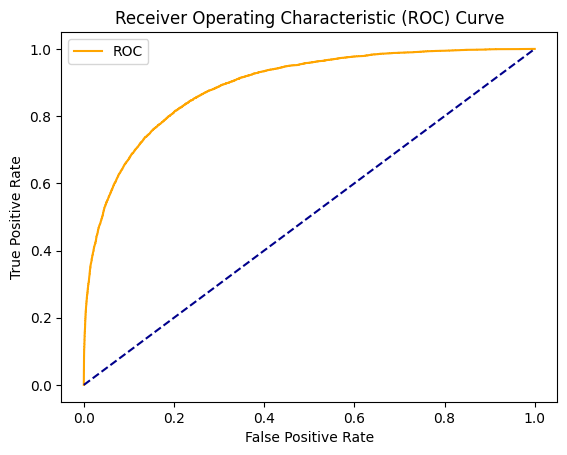

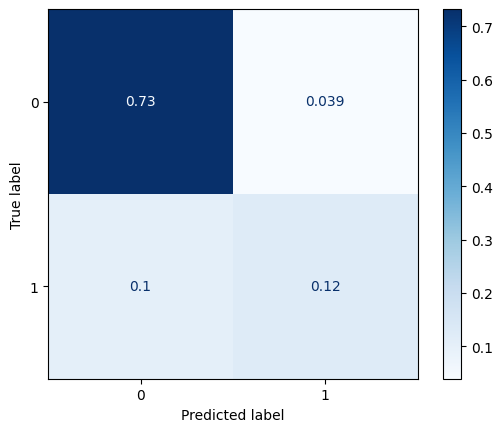

In [51]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

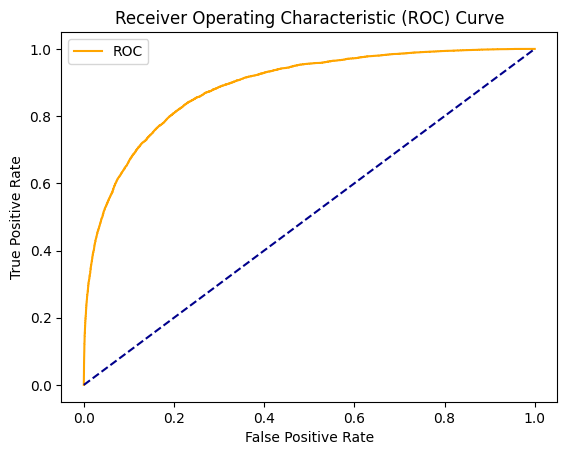

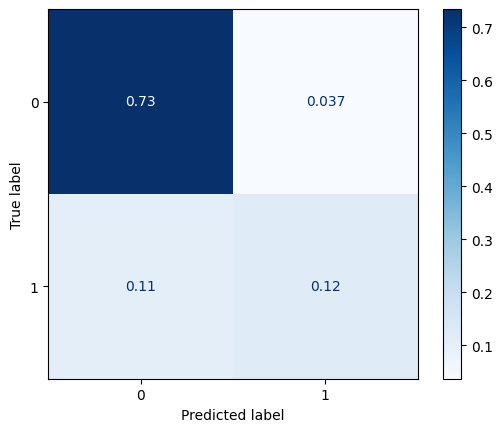

In [52]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_75021/23645140.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')


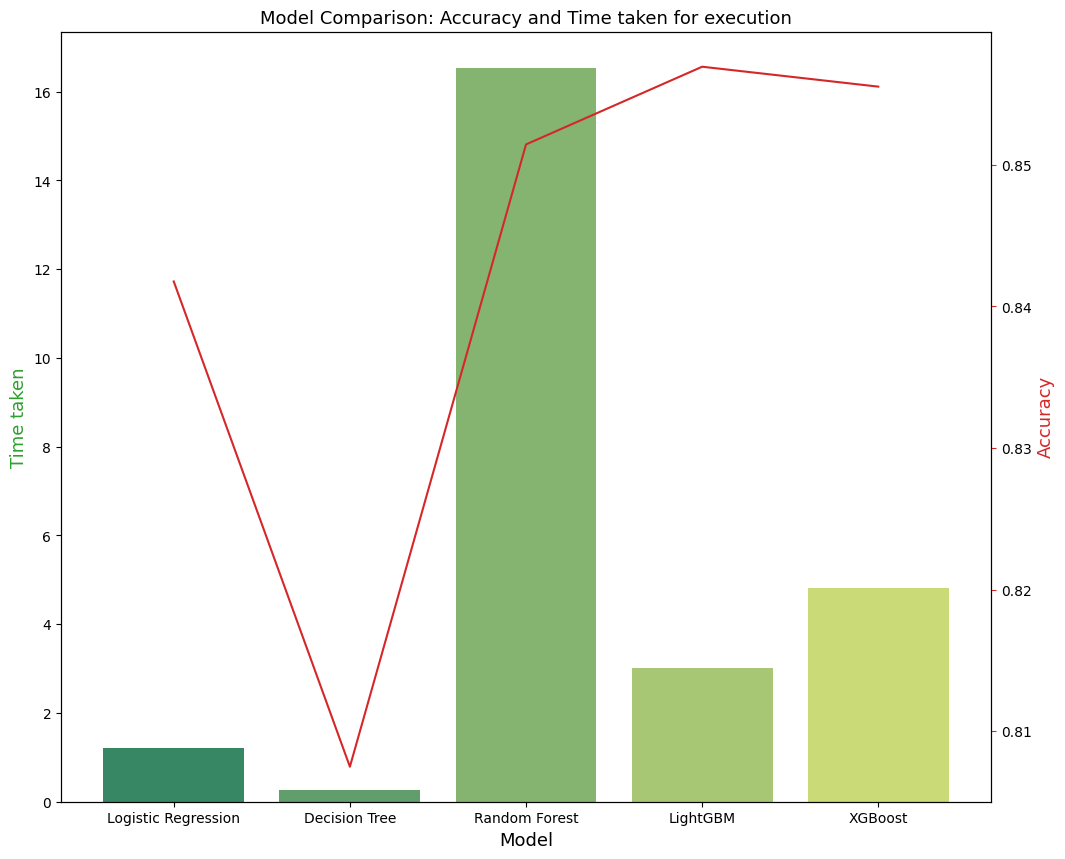

In [54]:
# Model Comparison

accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_lgb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_lgb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_lgb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','LightGBM','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

/var/folders/_8/39tyf_h90zs55k7vbcmmz6f40000gn/T/ipykernel_75021/4138913190.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')


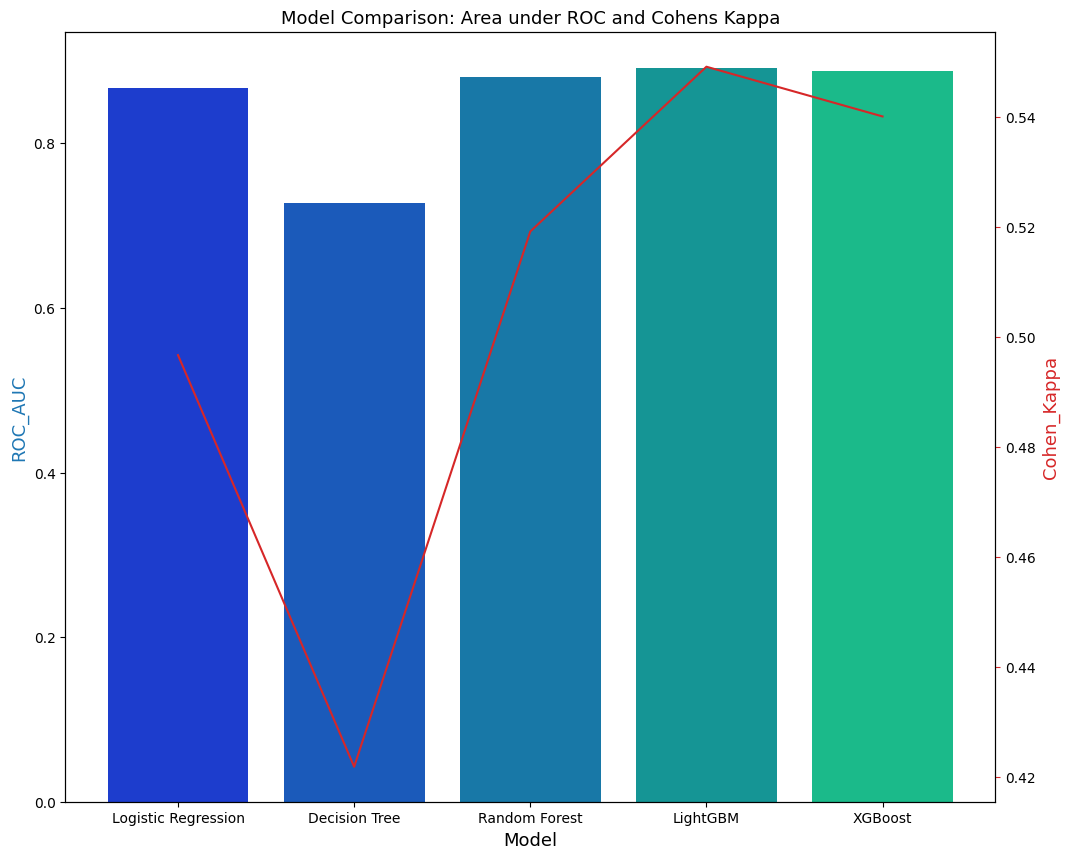

In [55]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()